### 1. 데이터 온라인 광고 클릭 데이터
###### - 훈련 데이터 2천건
###### - 테스트 데이터 2천건

In [72]:
import pandas as pd
train_df = pd.read_csv("train.csv",nrows=2000)

unused_columns,label_column = ["id","hour","device_id","device_ip"],"click"
train_df = train_df.drop(unused_columns,axis=1)
X_dict_train = list(train_df.drop(label_column,axis=1).T.to_dict().values())
y_train = train_df[label_column]

test_df = pd.read_csv("train.csv",header=0,skiprows=(1,2001),nrows=2000)
test_df = test_df.drop(unused_columns,axis=1)
X_dict_test = list(test_df.drop(label_column,axis=1).T.to_dict().values())
y_test = test_df[label_column]

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=True)

X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.fit_transform(X_dict_test)

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
parameters={"max_depth":[3,10,None]}
decision_tree = DecisionTreeClassifier(criterion="gini",min_samples_split=30)


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [106]:
decision_tree_best.score(X_train,y_train)
decision_tree_best=grid_search.best_estimator_

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = decision_tree_best.predict_proba(X_test)[:,1]
y_pred_proba

array([0.18527607, 0.18527607, 0.18527607, ..., 0.0718232 , 0.0718232 ,
       0.0718232 ])

In [107]:
fpr,tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
auc 

0.7169259621033943

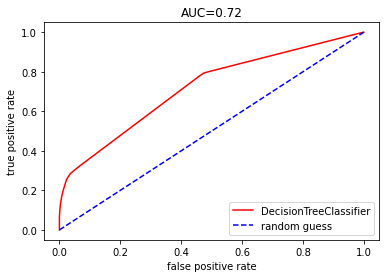

In [108]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,"r-",label = "DecisionTreeClassifier")
plt.plot([0,1],[0,1],"b--",label = "random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right")

In [14]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree_best,out_file=None, feature_names=vectorizer.feature_names_, class_names=["0","1"], rounded=True,filled=True,impurity=True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

graph.set_size('"100,100!"')
graph.write_png("cpc.png")

from IPython.core.display import Image
Image("cpc.png")

### 2. 분류 모델을 적용하여 훈련, 테스트, 평가
##### - 정확도
##### - confusion matrix

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
y_pred=decision_tree_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1652,   19],
       [ 265,   64]], dtype=int64)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=None, n_jobs=-1)
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600, n_jobs=-1)

In [110]:
from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(rf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=600, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [111]:
rf.score(X_train,y_train)
rf=grid_search.best_estimator_

In [112]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba2 = decision_tree_best.predict_proba(X_test)[:,1]
y_pred_proba2

array([0.18527607, 0.18527607, 0.18527607, ..., 0.07820647, 0.07820647,
       0.07820647])

In [114]:
fpr,tpr, _ = roc_curve(y_test,y_pred_proba2)
auc2 = roc_auc_score(y_test, y_pred_proba2)
auc2

0.7141820324906004

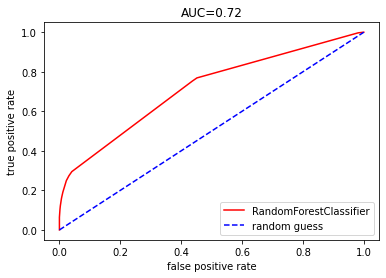

In [115]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,"r-",label = "RandomForestClassifier")
plt.plot([0,1],[0,1],"b--",label = "random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right")

### knn

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
knn.score(X_train,y_train)

0.9495

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = RandomForestClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'n_neighbors'

In [121]:
from sklearn.model_selection import KNeighborsClassifier
grid_search3 = GridSearchCV(knn, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search3.fit(X_train,y_train)

ImportError: cannot import name 'KNeighborsClassifier' from 'sklearn.model_selection' (C:\Users\687\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

### logistic

In [83]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()

In [88]:
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
model.score(X_train,y_train)

0.834

In [116]:
from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(rf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=10,
                                              min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)